In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/population density satellite data/Dataset"

In [ ]:
import os
files = os.listdir(dataset_path)

In [ ]:
len(files)

7012

In [ ]:

filers = []
for file in files:

  filers.append(file)


In [ ]:
from __future__ import division, print_function, absolute_import
print('Importing libraries...')
import pickle
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from skimage import transform #For downsizing images
from sklearn.model_selection import train_test_split

Importing libraries...


In [ ]:
# Creating features dataset
# unpickling the image files
with open ('/content/drive/MyDrive/population density satellite data/dataX', 'rb') as fp:
    dataX = pickle.load(fp)
print('Features dataset finished with shape', dataX.shape)


Features dataset finished with shape (7000, 200, 200, 3)


In [ ]:
# unpickling labels file
with open ('/content/drive/MyDrive/population density satellite data/dataY', 'rb') as fp:
    dataY = pickle.load(fp)
print('Labels dataset finished with shape', dataY.shape)

Labels dataset finished with shape (7000,)


In [ ]:
X_train = []
X_test = []
Y_train = []
Y_test = []

In [ ]:
dataX.shape[0]

7000

In [ ]:
for n in range(dataX.shape[0]):
    if not n%10:
        X_train.append(dataX[n])
        X_train.append(dataX[n+1])
        X_train.append(dataX[n+2])
        X_train.append(dataX[n+3])
        X_train.append(dataX[n+4])
        X_train.append(dataX[n+5])
        X_train.append(dataX[n+6])
        X_train.append(dataX[n+7])
        X_test.append(dataX[n+8])
        X_test.append(dataX[n+9])

        Y_train.append(dataY[n])
        Y_train.append(dataY[n+1])
        Y_train.append(dataY[n+2])
        Y_train.append(dataY[n+3])
        Y_train.append(dataY[n+4])
        Y_train.append(dataY[n+5])
        Y_train.append(dataY[n+6])
        Y_train.append(dataY[n+7])
        Y_test.append(dataY[n+8])
        Y_test.append(dataY[n+9])

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5600, 200, 200, 3) (1400, 200, 200, 3) (5600,) (1400,)


In [ ]:
def classify(t):
    i = 0
    for n in t:
        if (n<1):
            t[i] = 0
            i+=1
        if (1<=n) and (n<10):
            t[i] = 1
            i+=1
        if (10<=n) and (n<50):
            t[i] = 2
            i+=1
        if (50<=n) and (n<100):
            t[i] = 3
            i+=1
        if (100<=n) and (n<500):
            t[i] = 4
            i+=1
        if (500<=n) and (n<1000):
            t[i] = 5
            i+=1
        if (1000<=n) and (n<2000):
            t[i] = 6
            i+=1
        if (2000<=n):
            t[i] = 7
            i+=1
    return t

In [ ]:
Y_train = classify(Y_train)
Y_test = classify(Y_test)

In [ ]:
Y_train

array([2., 2., 2., ..., 4., 4., 3.])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train - 1, num_classes=8)
Y_test = to_categorical(Y_test - 1, num_classes=8)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
history = model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/40
175/175 [==============================] - 27s 148ms/step - loss: 3.3071 - accuracy: 0.3779 - val_loss: 1.4088 - val_accuracy: 0.4693
Epoch 2/40
175/175 [==============================] - 31s 175ms/step - loss: 1.5166 - accuracy: 0.4507 - val_loss: 1.3375 - val_accuracy: 0.4914
Epoch 3/40
175/175 [==============================] - 26s 150ms/step - loss: 1.3747 - accuracy: 0.4841 - val_loss: 1.3304 - val_accuracy: 0.5064
Epoch 4/40
175/175 [==============================] - 26s 151ms/step - loss: 1.3072 - accuracy: 0.5143 - val_loss: 1.3275 - val_accuracy: 0.4950
Epoch 5/40
175/175 [==============================] - 26s 148ms/step - loss: 1.2503 - accuracy: 0.5311 - val_loss: 1.2951 - val_accuracy: 0.5043
Epoch 6/40
175/175 [==============================] - 31s 177ms/step - loss: 1.1989 - accuracy: 0.5368 - val_loss: 1.3481 - val_accuracy: 0.4943
Epoch 7/40
175/175 [==============================] - 31s 179ms/step - loss: 1.1457 - accuracy: 0.5546 - val_loss: 1.2417 - val_ac

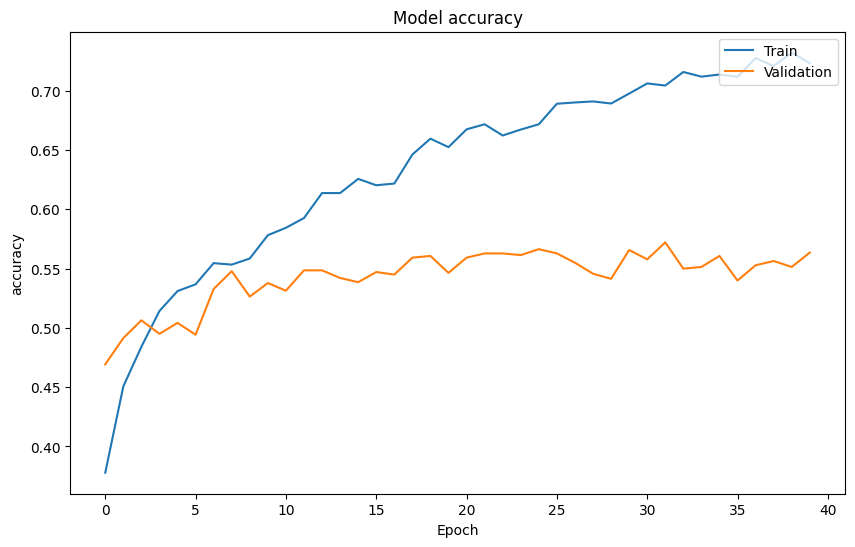

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# After training your model, call the plot_loss function with the training history
plot_accuracy(history)